<a href="https://colab.research.google.com/github/Buse-cetin/plate/blob/main/plakaTanima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.0 MB/s eta 0:00:00


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

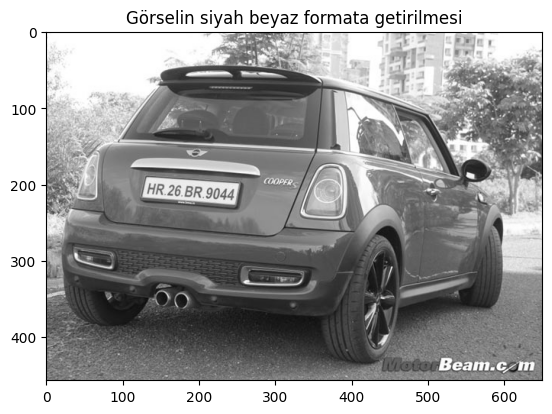

In [44]:
img = cv2.imread('image1.jpg')
plt.title("Görselin siyah beyaz formata getirilmesi")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

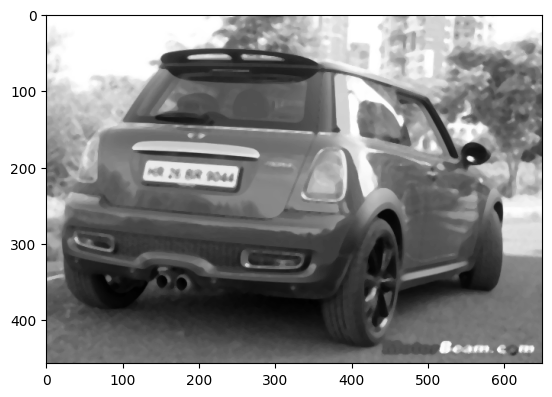

In [45]:
#islem resmi (ir_img)
    #Gürültülerden daha fazla kurtulmak için medianBlur işlemini iki kez yapıyoruz.
ir_img = cv2.medianBlur(gray,5) #5x5
ir_img = cv2.medianBlur(ir_img,5) #5x5
plt.imshow(ir_img,cmap="gray")
plt.show()

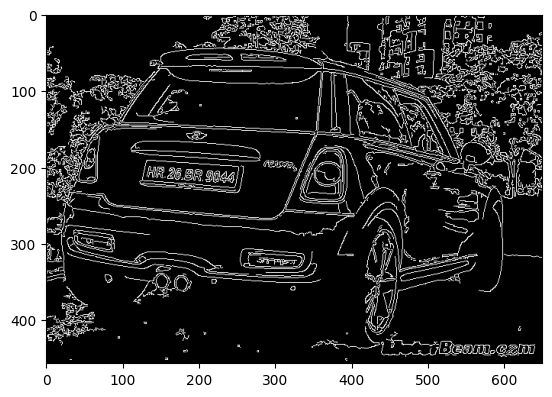

In [60]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

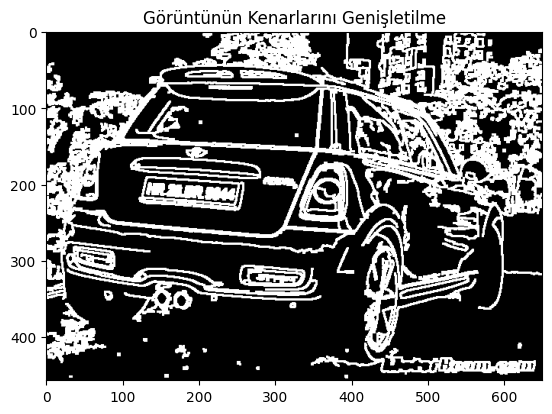

In [61]:
    # np.ones((3,3),np.uint8) -->
kenarlik = cv2.dilate(edged,np.ones((3,3),np.uint8),iterations=1) #genişletme işleminin kaç defa yapılacağını iterations parametresi ile belirtiriz.

plt.imshow(kenarlik,cmap="gray")
plt.title("Görüntünün Kenarlarını Genişletilme")
plt.show()

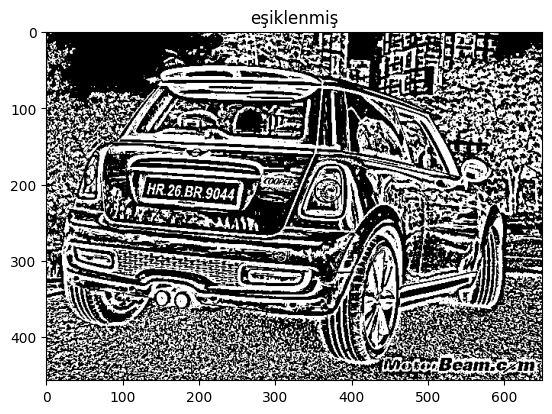

In [62]:
th_img = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)

plt.title("eşiklenmiş")
plt.imshow(th_img,cmap="gray")
plt.show()

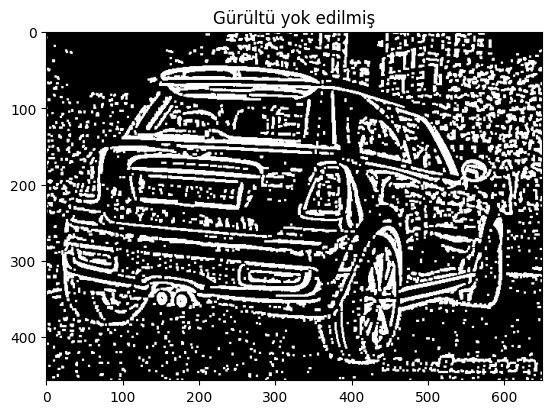

In [63]:
kernel = np.ones((3,3),np.uint8)
th_img = cv2.morphologyEx(th_img,cv2.MORPH_OPEN,kernel,iterations=1)
plt.title("Gürültü yok edilmiş")
plt.imshow(th_img,cmap="gray")
plt.show()

In [64]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [65]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [66]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [67]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

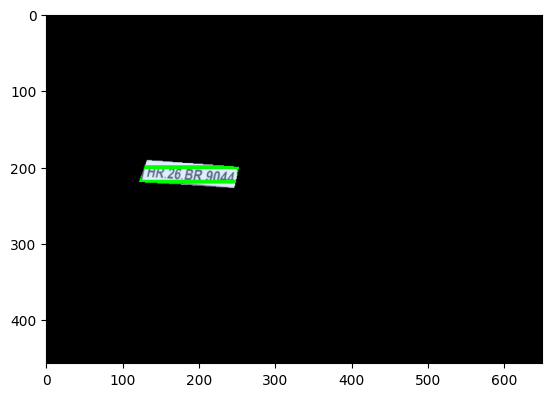

In [68]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [69]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

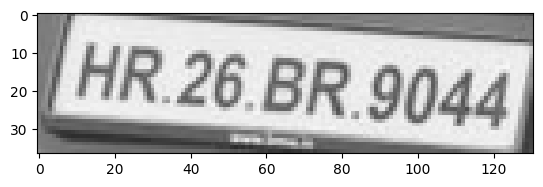

In [70]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [71]:
reader = easyocr.Reader(['tr'])
result = reader.readtext(cropped_image)
result

[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR 9044', 0.6299911953719713)]

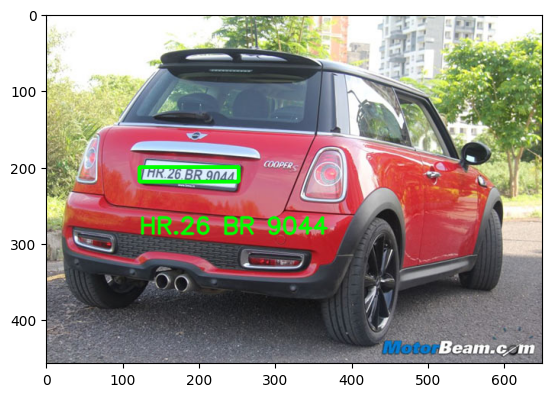

In [72]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))